In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [96]:
import seaborn as sns
df = pd.read_csv('../Buoi1/dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

# Phần 1: Preprocessing

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSV                 100 non-null    object 
 1   GT                   100 non-null    object 
 2   DT                   3 non-null      float64
 3   KV                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   KT                   100 non-null    object 
 8   NGAYTHI              100 non-null    object 
 9   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(6)
memory usage: 7.9+ KB


Biến dân tộc bị thiếu

In [98]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSSV    100 non-null    object 
 1   GT      100 non-null    object 
 2   DT      3 non-null      float64
 3   KV      100 non-null    object 
 4   M1      100 non-null    float64
 5   M2      100 non-null    float64
 6   M3      100 non-null    float64
 7   KT      100 non-null    object 
 8   NT      100 non-null    object 
 9   NGHE    100 non-null    object 
dtypes: float64(4), object(6)
memory usage: 7.9+ KB


In [99]:
df.head()

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [100]:
#Loai bo dữ liệu rỗng
df.dropna(how='all', inplace=True)

In [101]:
#Loại bỏ dữ liệu trùng
df.drop_duplicates(inplace=True)

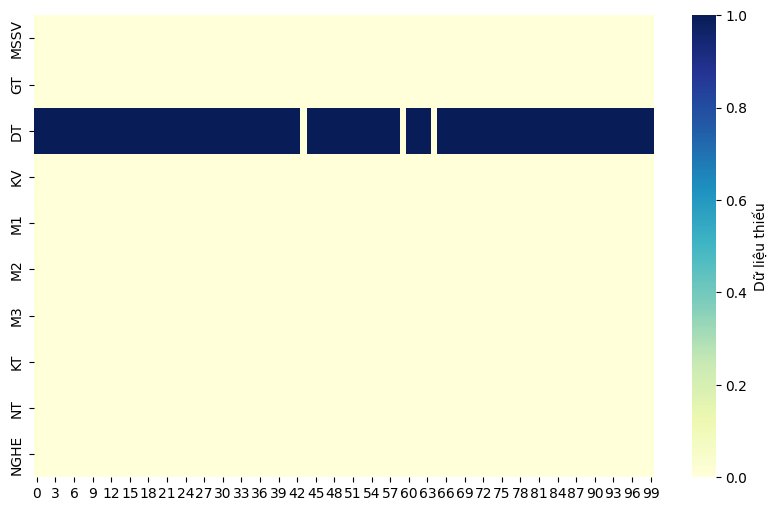

In [102]:
#Dùng Heatmap để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

#### Tất cả đều màu vàng nên không thiếu
#### Đoạn xanh dương thiếu nhiều
### Có dữ liệu thiếu thì phải xử lý
## Sau khi xử lý => không còn thiếu

In [103]:
#Điền giá trị thiếu, nếu loại bỏ thì mất đặc trưng
df['DT'].fillna('KINH', inplace=True)
#Phương pháp biết để thêm dữ liệu thiếu là gì, 1 là khảo sát, 2 sử dụng giá trị xuất hiện nhiều nhất gọi là yếu vị

/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_46729/1326001878.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)


In [104]:
#M1 điền thiếu bằng giá trị trung bình
df['M1'].fillna(df['M1'].mean(), inplace=True)
#M2 điền thiếu bằng giá trị trung vị
df['M2'].fillna(df['M2'].median(), inplace=True)
#lưu ý biến định lượng nên thay bằng trung vị
#M1 điền thiếu bằng giá trị 0
df['M3'].fillna(0, inplace=True)

# Phần 2: Kỹ thuật bổ dung thêm các cột nghiệp vụ

In [105]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667


In [106]:
# Tạo ra cột biến XIEPLOAI: Đánh giá dựa trên TBM
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df

/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_46729/2614891389.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'FAIL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL
...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL


## Tạo dữ liệu bằng Dict_map

In [107]:
# Tạo biến nhóm khối thi: NHOM thỏa mãn
#A1: Group1 (G1)
#C: Group3 (G3)
# ................
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3


#### Nếu nhóm G1, G2 và TBM >=5 sẽ có PLUS

In [108]:
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM,PLUS
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1,0.0
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3,0.0
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3,0.0
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3,0.0
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3,0.0


# Phần 3: Trực quan hóa dữ liệu

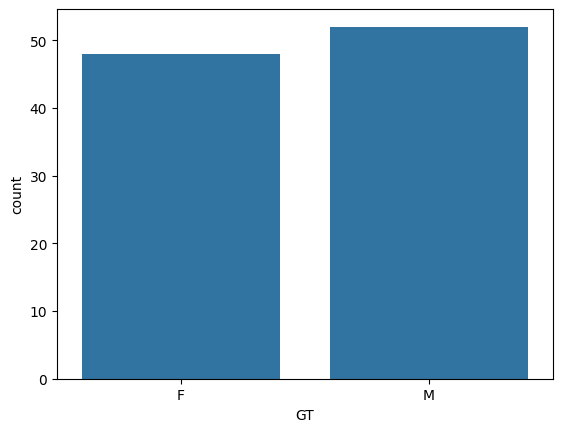

In [109]:
sns.countplot(x='GT', data=df)
plt.show()

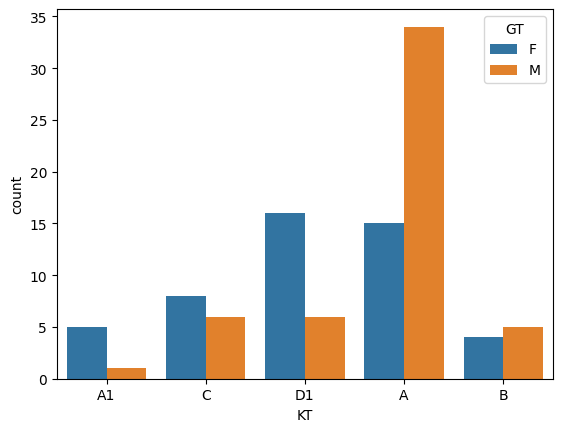

In [110]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

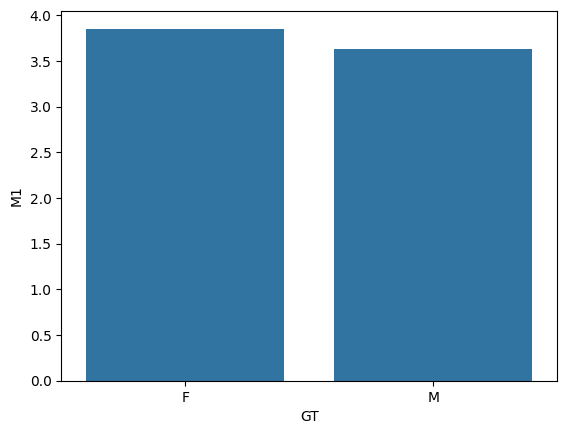

In [111]:
# Hãy so sánh điểm trungg bình với giới tính => nam học kém hơn
sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()

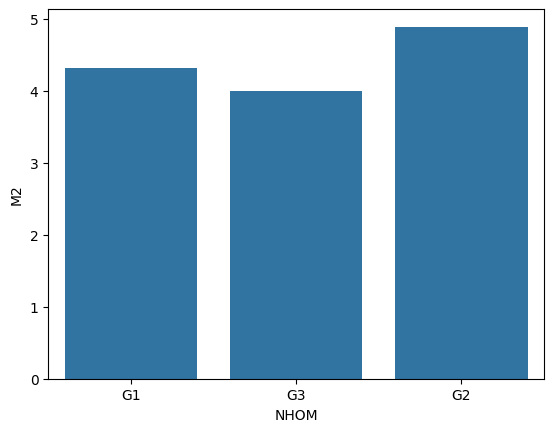

In [112]:
#hãy so sánh trung bình điểm M2 theo NHOM
# cho biết nhóm thi nào có điểm thi M2 cao nhất
sns.barplot(x='NHOM', y='M2', data=df, errorbar=None)
plt.show()

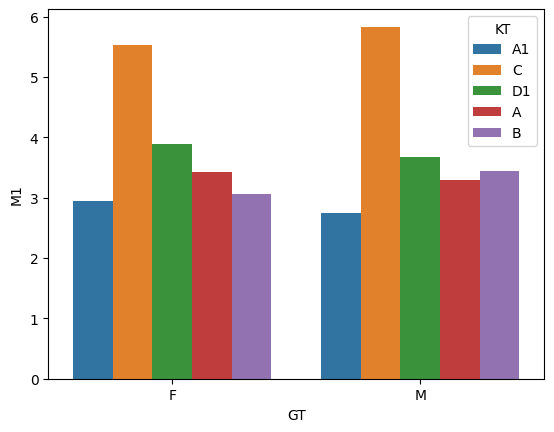

In [113]:
#So sánh điểm trung bình của M1 theo nhóm GT
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()

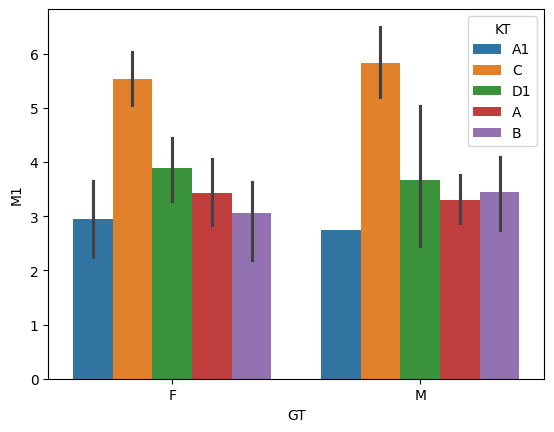

In [114]:
#Biểu thị sai số, đường thẳng đen càng dài, mức độ tin cậy càng thấp
sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()
# Nam khối D1 không đáng tin cậy

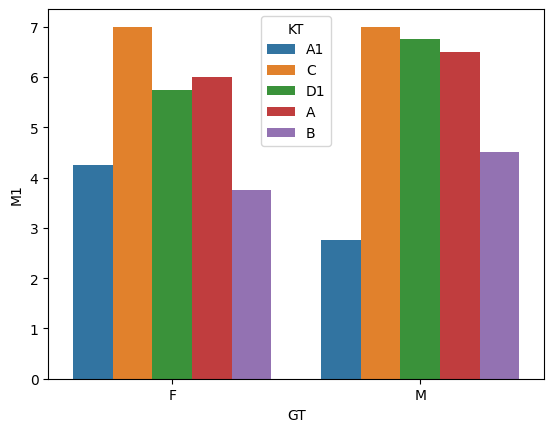

In [115]:

sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()

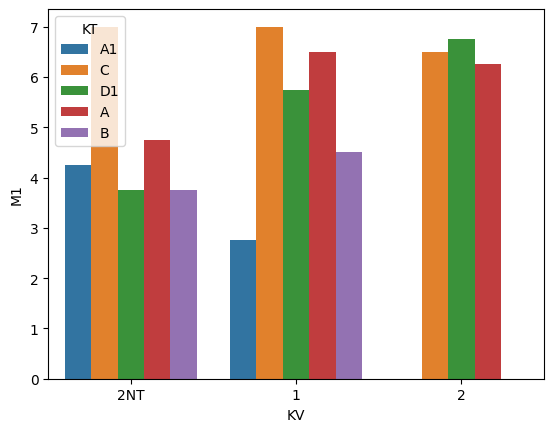

In [116]:
#Khi biến định tính dùng làm nhóm tổng hợp,
import numpy as np
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()
# Điển M1 cao nhất ở khối C

### Biểu đồ tròn trực quan về số lượng

Câu hỏi: Màu xanh dương giá trị bao nhiêu

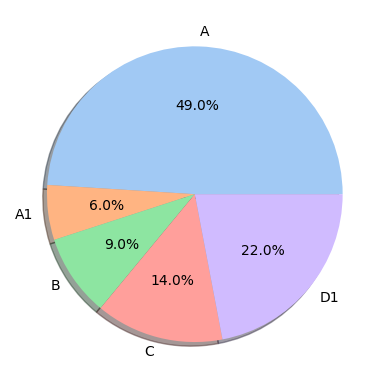

In [117]:
# Gom nhóm các dữ liệu
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
         autopct='%1.1f%%',shadow=True) # Chú ý autopct='%1.1f%%' đưa ra được giá trị của các ô màu

plt.show()

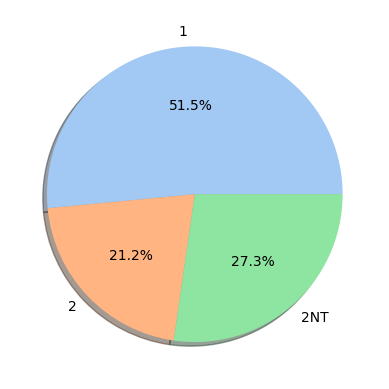

In [118]:
# Viết dựa trên biến định lượng, tổng hợp hàm SUM
gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

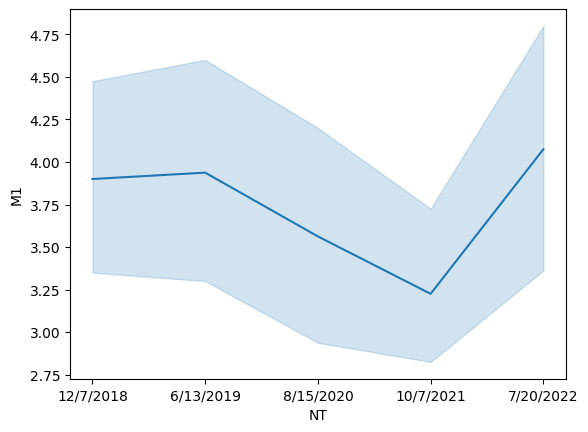

In [119]:
# Tổng hợp trung bình điểm M1 theo các kỳ thi
sns.lineplot(x='NT', y='M1', data=df)
plt.show()


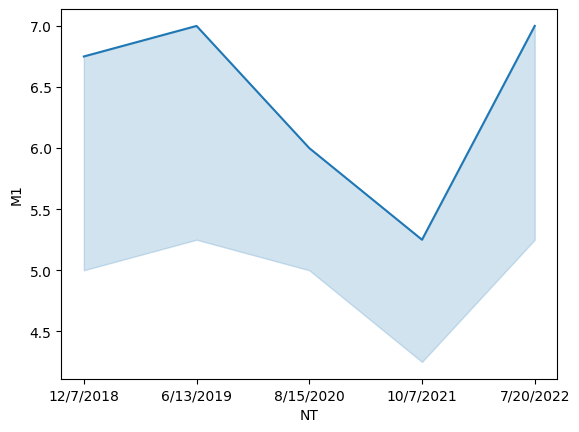

In [120]:
#Giá trị lớn nhất của M1 
sns.lineplot(x='NT', y='M1', data=df, estimator=np.max)
plt.show()

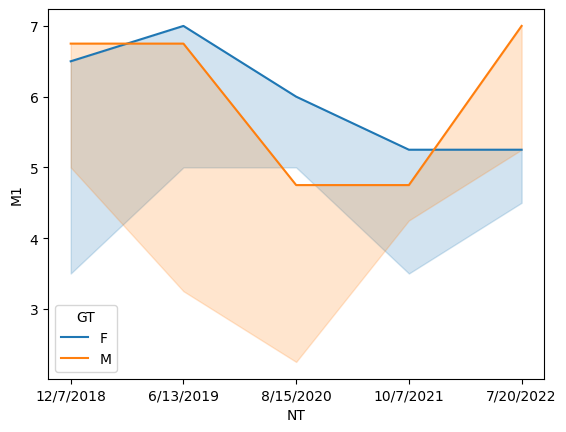

In [121]:

sns.lineplot(x='NT', y='M1', hue='GT', # Nhóm phải là biến định tính
             data=df, estimator=np.max)
plt.show()

# Phần 4: Thống kê mô tả